# Evaluate all embeddings generated with parameter_search

In [1]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
import datetime
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from evaluation_functions import nn, sil

In [3]:
wd = os.getcwd()

DF = os.path.join(os.path.sep, str(Path(wd).parents[0]), "data", "processed", "df_focal_reduced.pkl")
OUT_COORDS = os.path.join(os.path.sep, str(Path(wd).parents[0]), "data", "interim", "parameter_search", "umap_coords_3D")
OUT_EVALS = os.path.join(os.path.sep, str(Path(wd).parents[0]), "data", "interim", "parameter_search", "umap_evals_3D")

In [4]:
spec_df = pd.read_pickle(DF)
print(spec_df.shape)

labels = spec_df.call_lable.values
labeltypes = sorted(list(set(labels)))

(6428, 34)


In [5]:
params = ['preprocess_type', 'metric_type', 'duration_method','min_dist', 'spread', 'n_neighbors', 'n_comps', 'input_type', 'denoised', 'n_mels', 'f_unit', 'n_repeat']

In [6]:
all_embedding_files = list(sorted(os.listdir(OUT_COORDS)))
print(len(all_embedding_files))

220


In [ ]:
#outname = os.path.join(os.path.sep, OUT_EVALS, 'eval_table_3D_5.csv')
#eval_table = pd.read_csv(outname, sep=";")
#already_evaluated = [x+'.csv' for x in eval_table[params].astype(str).agg('_'.join, axis=1)]
#not_evaluated = list(set(all_embedding_files) - set(already_evaluated))

In [117]:
eval_colnames = params+ ['S_total'] + ['S_'+x for x in labeltypes] + ['Snorm_total'] + ['Snorm_'+x for x in labeltypes] + ['SIL_total'] + ['SIL_'+x for x in labeltypes] + ['knncc_'+x for x in labeltypes] + ['knn-acc_'+x for x in labeltypes]
print(eval_colnames)

eval_table = np.zeros((len(all_embedding_files), len(eval_colnames)))
eval_table = pd.DataFrame(eval_table, columns=eval_colnames)

['preprocess_type', 'metric_type', 'duration_method', 'min_dist', 'spread', 'n_neighbors', 'n_comps', 'input_type', 'denoised', 'n_mels', 'f_unit', 'n_repeat', 'S_total', 'S_agg', 'S_al', 'S_cc', 'S_ld', 'S_mo', 'S_sn', 'S_soc', 'Snorm_total', 'Snorm_agg', 'Snorm_al', 'Snorm_cc', 'Snorm_ld', 'Snorm_mo', 'Snorm_sn', 'Snorm_soc', 'SIL_total', 'SIL_agg', 'SIL_al', 'SIL_cc', 'SIL_ld', 'SIL_mo', 'SIL_sn', 'SIL_soc', 'knncc_agg', 'knncc_al', 'knncc_cc', 'knncc_ld', 'knncc_mo', 'knncc_sn', 'knncc_soc']


In [118]:
k=5

for i,embedding_file in enumerate(all_embedding_files):
    embedding = np.loadtxt(os.path.join(os.path.sep, OUT_COORDS, embedding_file),delimiter=";")
    
    embedding_params_string = embedding_file.replace('.csv', '')
    embedding_params_list = embedding_params_string.split('_')
    
    nn_stats = nn(embedding, labels, k=k)
    sil_stats = sil(embedding, labels)

    eval_vector = embedding_params_list + [nn_stats.get_S()] + list(nn_stats.get_ownclass_S()) + [nn_stats.get_Snorm()] + list(nn_stats.get_ownclass_Snorm()) + [sil_stats.get_avrg_score()] + list(sil_stats.get_score_per_class()) + list(nn_stats.knn_cc()) + list(nn_stats.knn_accuracy())
    eval_table.loc[i,:] = eval_vector

In [119]:
eval_table

,preprocess_type,metric_type,duration_method,min_dist,spread,n_neighbors,n_comps,input_type,denoised,n_mels,...,SIL_mo,SIL_sn,SIL_soc,knncc_agg,knncc_al,knncc_cc,knncc_ld,knncc_mo,knncc_sn,knncc_soc
0,no,euclidean,pad,0,1,15,3,melspecs,no,40,...,-0.162250,0.196848,-0.334800,2.133333,27.089783,17.129316,0.0,10.803689,78.382749,15.337955
1,no,euclidean,pad,0,1,15,3,melspecs,no,40,...,-0.154737,0.225903,-0.338003,4.266667,28.947368,16.519973,0.0,12.384717,78.814016,16.637782
2,no,euclidean,pad,0,1,15,3,melspecs,no,40,...,-0.153415,0.215311,-0.341737,5.600000,25.696594,16.723087,0.0,12.516469,76.603774,17.590988
3,no,euclidean,pad,0,1,15,3,melspecs,no,40,...,-0.159414,0.205332,-0.334261,5.066667,27.089783,17.603250,0.0,11.067194,77.897574,18.544194
4,no,euclidean,pad,0,1,15,3,melspecs,no,40,...,-0.164130,0.225810,-0.347714,5.600000,27.089783,14.895058,0.0,11.067194,78.436658,17.331023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,zs,manhattan,pad,0,1,15,3,melspecs,no,40,...,0.207570,0.566623,-0.061084,7.733333,52.631579,41.232227,0.0,37.022398,76.927224,34.055459
216,zs,manhattan,pad,0,1,15,3,melspecs,no,40,...,0.228407,0.560805,-0.062768,8.533333,49.380805,40.216655,0.0,34.387352,79.029650,33.968804
217,zs,manhattan,pad,0,1,15,3,melspecs,no,40,...,0.204813,0.569680,-0.066716,5.866667,53.095975,40.961408,0.0,35.836627,78.005391,33.015598
218,zs,manhattan,pad,0,1,15,3,melspecs,no,40,...,0.225342,0.557857,-0.062349,7.466667,52.476780,38.659445,0.0,37.549407,77.951482,32.755633


In [120]:
eval_table['knncc_total'] = eval_table[['knncc_'+x for x in labeltypes]].mean(axis=1)
eval_table['knn-acc_total'] = eval_table[['knn-acc_'+x for x in labeltypes]].mean(axis=1)

In [121]:
outname = os.path.join(os.path.sep, OUT_EVALS, 'eval_table_3D_'+str(k)+'.csv')
eval_table.to_csv(outname, sep=";",  index=False)

## Plot results

In [122]:
FIGURES = os.path.join(os.path.sep, str(Path(wd).parents[0]), "reports", "figures", "parameter_search_3D")

In [6]:
outname = os.path.join(os.path.sep, OUT_EVALS, 'eval_table_3D_5.csv')
eval_table = pd.read_csv(outname, sep=";")

In [7]:
eval_table["min_dist"] = pd.to_numeric(eval_table["min_dist"])
eval_table["n_neighbors"] = pd.to_numeric(eval_table["n_neighbors"])
eval_table["spread"] = pd.to_numeric(eval_table["spread"])
eval_table["n_comps"] = pd.to_numeric(eval_table["n_comps"])
eval_table["n_mels"] = pd.to_numeric(eval_table["n_mels"])
eval_table["n_repeat"] = pd.to_numeric(eval_table["n_repeat"])

In [8]:
eval_table

,preprocess_type,metric_type,duration_method,min_dist,spread,n_neighbors,n_comps,input_type,denoised,n_mels,...,SIL_sn,SIL_soc,knncc_agg,knncc_al,knncc_cc,knncc_ld,knncc_mo,knncc_sn,knncc_soc,knncc_total
0,no,euclidean,pad,0.0,1.0,15,3,melspecs,no,40,...,0.196848,-0.334800,2.133333,27.089783,17.129316,0.0,10.803689,78.382749,15.337955,21.553832
1,no,euclidean,pad,0.0,1.0,15,3,melspecs,no,40,...,0.225903,-0.338003,4.266667,28.947368,16.519973,0.0,12.384717,78.814016,16.637782,22.510075
2,no,euclidean,pad,0.0,1.0,15,3,melspecs,no,40,...,0.215311,-0.341737,5.600000,25.696594,16.723087,0.0,12.516469,76.603774,17.590988,22.104416
3,no,euclidean,pad,0.0,1.0,15,3,melspecs,no,40,...,0.205332,-0.334261,5.066667,27.089783,17.603250,0.0,11.067194,77.897574,18.544194,22.466952
4,no,euclidean,pad,0.0,1.0,15,3,melspecs,no,40,...,0.225810,-0.347714,5.600000,27.089783,14.895058,0.0,11.067194,78.436658,17.331023,22.059959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,zs,manhattan,pad,0.0,1.0,15,3,melspecs,no,40,...,0.566623,-0.061084,7.733333,52.631579,41.232227,0.0,37.022398,76.927224,34.055459,35.657460
216,zs,manhattan,pad,0.0,1.0,15,3,melspecs,no,40,...,0.560805,-0.062768,8.533333,49.380805,40.216655,0.0,34.387352,79.029650,33.968804,35.073800
217,zs,manhattan,pad,0.0,1.0,15,3,melspecs,no,40,...,0.569680,-0.066716,5.866667,53.095975,40.961408,0.0,35.836627,78.005391,33.015598,35.254524
218,zs,manhattan,pad,0.0,1.0,15,3,melspecs,no,40,...,0.557857,-0.062349,7.466667,52.476780,38.659445,0.0,37.549407,77.951482,32.755633,35.265631


In [ ]:
eval_table['knn-acc_']

In [125]:
duration_method = eval_table.duration_method.copy()

In [126]:
dur_dict = {'overlap-only': 'overlap',
           'timeshift-overlap': 'tshift-overlap',
           'timeshift-pad': 'tshift-pad',
           'pairwise-pad': 'pw-pad'}

duration_method = [dur_dict[x] if x in dur_dict.keys() else x for x in duration_method]
eval_table['duration_method'] = duration_method

In [127]:
# Remove invalid spread
eval_table = eval_table.loc[eval_table.spread!=0.1,:]

# Remove invalid input_type
#eval_table = eval_table.loc[eval_table.input_type!='mfccs',:]
#eval_table['input_type'] = [x if x!='zmfccs' else 'mfccs' for x in eval_table.input_type]

In [128]:
calltypes = sorted(list(set(spec_df.call_lable)))
pal = sns.color_palette("Set2", n_colors=len(calltypes))

In [134]:
params = ['preprocess_type', 'metric_type', 'duration_method','min_dist', 'spread', 'n_neighbors', 'n_comps', 'input_type','denoised', 'n_mels', 'f_unit', 'n_repeat']
p_default = dict(zip(params[:-1], ['zs', 'euclidean', 'pad', 0.0, 1.0, 15, 3, 'melspecs', 'no', 40, 'dB']))

denoised


(50.0, 67.0)

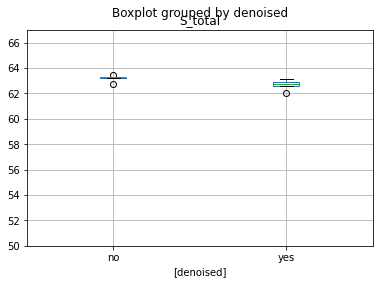

In [135]:
param = 'denoised'
print(param)

outvar="S_total"
other_params = set(params).difference([param, 'n_repeat'])

df = eval_table
for p in other_params:
    df = df.loc[df[p]==p_default[p],:]
boxplot = df[[param]+[outvar]].boxplot(by=param)
plt.ylim(50,67)

In [137]:
y_lower_dict = {"SIL":-0.65,
                "SIL_total": -0.06,
                "S":0,
                "S_total": 45,
                "knncc":0,
                "knncc_total": 20,
                "knn-acc":0,
                "knn-acc_total": 20}
y_upper_dict = {"SIL":0.65,
                "SIL_total": 0.23,
                "S":100,
                "S_total": 67,
                "knncc":100,
                "knncc_total": 60,
                "knn-acc":100,
                "knn-acc_total": 60}

In [143]:
# BOXPLOTS

for outvar in ['S_total', 'SIL_total']:
    for param in params[:-1]:
        other_params = set(params).difference([param, 'n_repeat'])

        df = eval_table
        for p in other_params:
            df = df.loc[df[p]==p_default[p],:]
        boxplot = df[[param]+[outvar]].boxplot(by=param)

        plt.ylim(y_lower_dict[outvar], y_upper_dict[outvar])
        plt.suptitle('')
        plt.title('')
        plt.xlabel(param)
             
        plt.savefig(os.path.join(os.path.sep, FIGURES,'box_'+outvar+'_'+param+'.jpg'))
        plt.close()

In [139]:
# LINE PLOTS

for out_v in ["SIL", "S", "knncc"]:
    outvars = [out_v+'_'+x for x in calltypes]
    #outvars = [out_v+'_total']+outvars
    
    for param in params[:-1]:
        other_params = set(params).difference([param, 'n_repeat'])

        df = eval_table
        for p in other_params:
            df = df.loc[df[p]==p_default[p],:]
        #print(df.shape)
        means = df[[param, out_v+'_total']]
        df = df[[param]+outvars]

        melted = pd.melt(df, id_vars=param, value_vars=outvars)
        melted = melted.sort_values(by=param)

        sns.lineplot(x=param, y="value", hue="variable", data=melted, palette="Set2", hue_order=outvars, err_style='band')
        sns.lineplot(x=param, y=out_v+'_total', data=means, color='black')
        plt.ylabel(out_v)
        plt.ylim(y_lower_dict[out_v], y_upper_dict[out_v])
        
        lg = plt.legend(bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0.)
        plt.savefig(os.path.join(os.path.sep, FIGURES,'line_'+out_v+'_'+param+'.jpg'), bbox_extra_artists=(lg,), bbox_inches='tight')
        plt.close()

In [144]:
# Lineplots with error bars

for out_v in ["SIL", "S", "knncc"]:
    outvars = [out_v+'_'+x for x in calltypes]
    color_dict = dict(zip(outvars, pal))

    for param in params[:-1]:
        other_params = set(params).difference([param, 'n_repeat'])

        df = eval_table
        for p in other_params:
            df = df.loc[df[p]==p_default[p],:]
        #print(df.shape)
        means = df[[param, out_v+'_total']]
        df = df[[param]+outvars]
        
        levels = sorted(list(set(df[param])))
        mean_df = df.groupby([param]).mean()
        std_df = df.groupby([param]).std()

        fig, ax = plt.subplots(figsize=(7, 4))

        for outvar in outvars:
            y = mean_df[outvar].values
            yerr = std_df[outvar].values
            ax.errorbar(levels, y, yerr=yerr,color=color_dict[outvar]) # linestype=ls

        ax.set_ylim(y_lower_dict[out_v], y_upper_dict[out_v])
        ax.set_title(param)
        plt.savefig(os.path.join(os.path.sep, FIGURES,'err_'+out_v+'_'+param+'.jpg'))
        plt.close()

In [147]:
# Lineplots with error bars with Mean (?)

for out_v in ["SIL", "S", "knncc"]:
#for out_v in ["S"]:
    outvars = [out_v+'_'+x for x in calltypes]
    color_dict = dict(zip(outvars, pal))
    
    outvars = [out_v+'_total']+outvars
    color_dict[out_v+'_total'] = "black"
    #for param in params[0:2]:
    for param in params[:-1]:
        other_params = set(params).difference([param, 'n_repeat'])

        df = eval_table
        for p in other_params:
            df = df.loc[df[p]==p_default[p],:]
        #print(df.shape)
        means = df[[param, out_v+'_total']]
        df = df[[param]+outvars]
        
        levels = sorted(list(set(df[param])))
        mean_df = df.groupby([param]).mean()
        std_df = df.groupby([param]).std()

        fig, ax = plt.subplots(figsize=(7, 4))

        for outvar in outvars:
            y = mean_df[outvar].values
            yerr = std_df[outvar].values
            ax.errorbar(levels, y, yerr=yerr,color=color_dict[outvar]) # linestype=ls

        ax.set_ylim(y_lower_dict[out_v], y_upper_dict[out_v])
        ax.set_title(param)
        plt.savefig(os.path.join(os.path.sep, FIGURES,'errmean_'+out_v+'_'+param+'.jpg'))
        plt.close()

In [ ]:
#df = df.groupby([param]).mean()

In [269]:
eval_table.head(5)

,preprocess_type,metric_type,duration_method,min_dist,spread,n_neighbors,n_comps,input_type,denoised,n_mels,...,SIL_sn,SIL_soc,knncc_agg,knncc_al,knncc_cc,knncc_ld,knncc_mo,knncc_sn,knncc_soc,knncc_total
0,no,euclidean,pad,0.0,1.0,15,5,melspecs,no,40,...,0.394241,-0.415412,4.266667,35.448916,19.566689,0.0,15.415020,79.083558,23.223570,25.286346
1,no,euclidean,pad,0.0,1.0,15,5,melspecs,no,40,...,0.399913,-0.419289,3.466667,36.687307,22.613406,0.0,16.732543,79.838275,22.963605,26.043114
2,no,euclidean,pad,0.0,1.0,15,5,melspecs,no,40,...,0.389978,-0.408692,6.933333,35.139319,20.379147,0.0,12.516469,77.088949,21.923744,24.854423
3,no,euclidean,pad,0.0,1.0,15,5,melspecs,no,40,...,0.396846,-0.416409,5.066667,35.913313,19.702099,0.0,13.570487,77.735849,22.530329,24.931249
4,no,euclidean,pad,0.0,1.0,15,5,melspecs,no,40,...,0.396419,-0.413416,4.800000,35.603715,22.410291,0.0,16.864295,78.921833,22.357019,25.851022


In [22]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [130]:
print(np.min(eval_table.S_total))
print(np.max(eval_table.S_total))

47.73193224850307
64.00197478770038


In [131]:
plot_params = ['input_type',
               'preprocess_type',
               'metric_type',
               'min_dist',                            
               'duration_method',
               'denoised',
               'spread',
               'n_neighbors',               
               'n_mels',
               'f_unit',
               'n_comps']

In [135]:
outvar = 'S_total'

for i, param in enumerate(plot_params):
    print(param)
    other_params = set(params).difference([param, 'n_repeat'])
    df = eval_table
    for p in other_params:
        df = df.loc[df[p]==p_default[p],:]
        
    levels = sorted(list(set(df[param])))
    print(levels)
    # STATS
    mod = ols(outvar+'~'+param, data=df).fit()
    aov_table = sm.stats.anova_lm(mod, typ=2)
    print(aov_table)
    #print(mod.summary())

input_type
['melspecs', 'mfccs']
               sum_sq   df           F        PR(>F)
input_type  21.805915  1.0  358.338306  6.273616e-08
Residual     0.486823  8.0         NaN           NaN
preprocess_type
['no', 'zs', 'zs-cu', 'zs-cu-fl', 'zs-cu-fl-ce']
                     sum_sq    df            F        PR(>F)
preprocess_type  846.092052   4.0  4833.085595  1.527387e-29
Residual           0.875313  20.0          NaN           NaN
metric_type
['correlation', 'cosine', 'euclidean', 'manhattan']
               sum_sq    df         F    PR(>F)
metric_type  1.330399   3.0  8.828488  0.001101
Residual     0.803701  16.0       NaN       NaN
min_dist
[0.0, 0.001, 0.01, 0.1, 1.0]
             sum_sq    df           F        PR(>F)
min_dist  73.760570   1.0  698.451234  1.031127e-18
Residual   2.428936  23.0         NaN           NaN
duration_method
['overlap', 'pad', 'pw-pad', 'tshift-overlap', 'tshift-pad']
                    sum_sq    df          F        PR(>F)
duration_method  41.688

# S_total and SIL_total

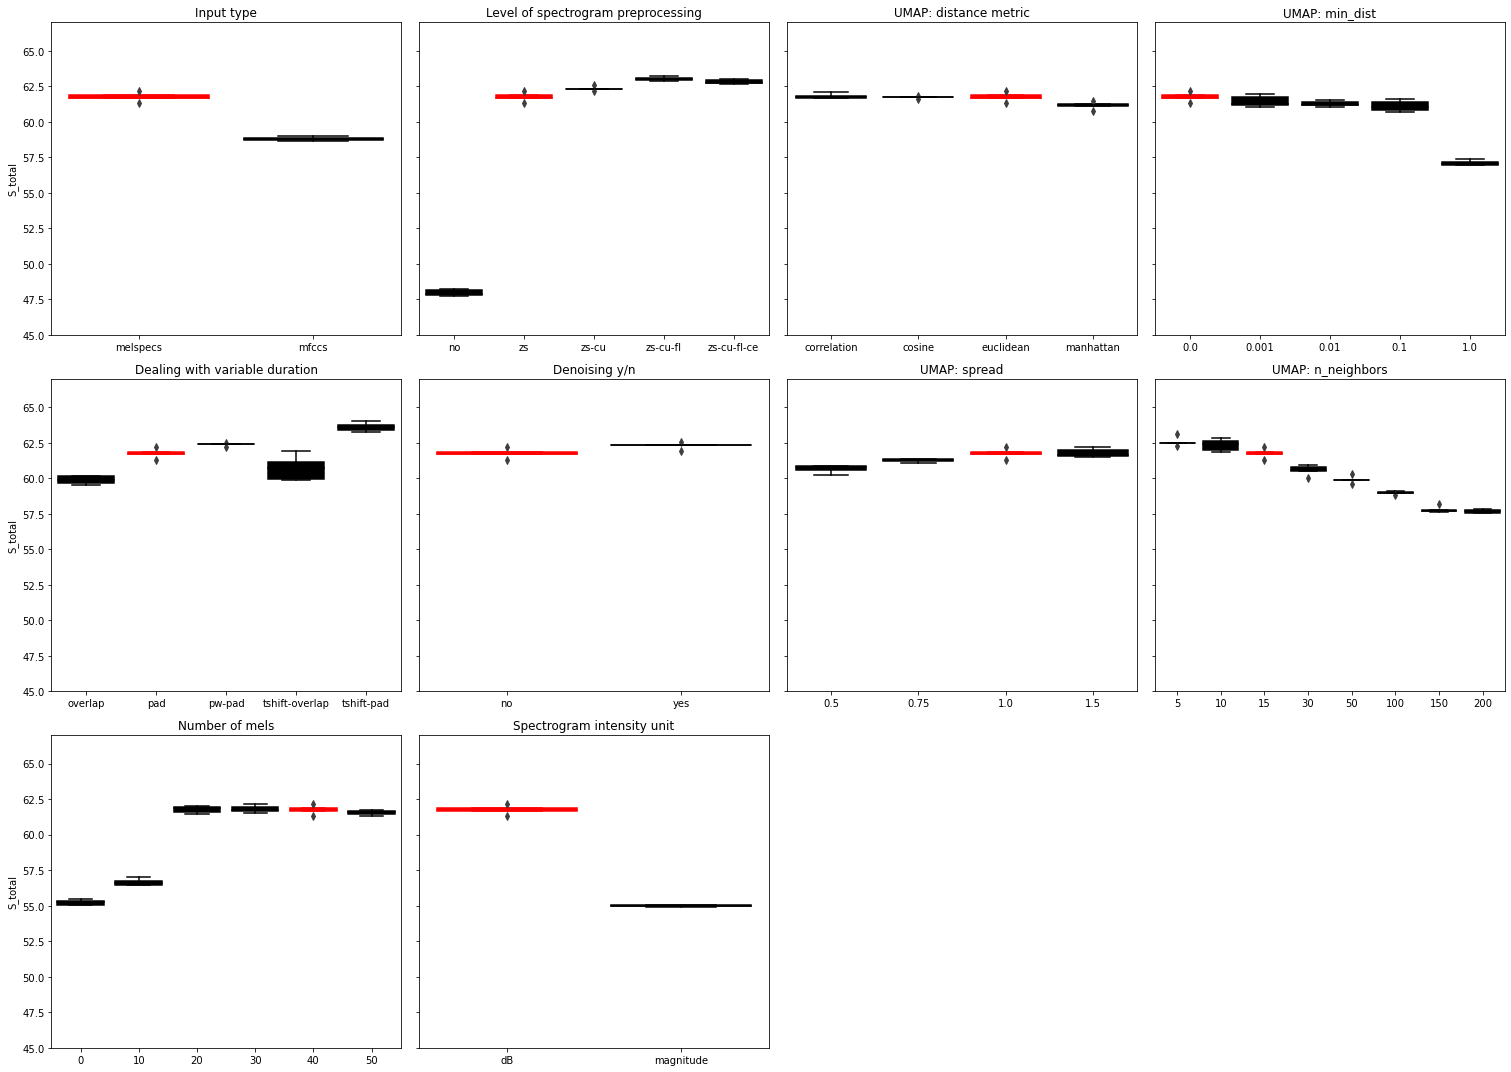

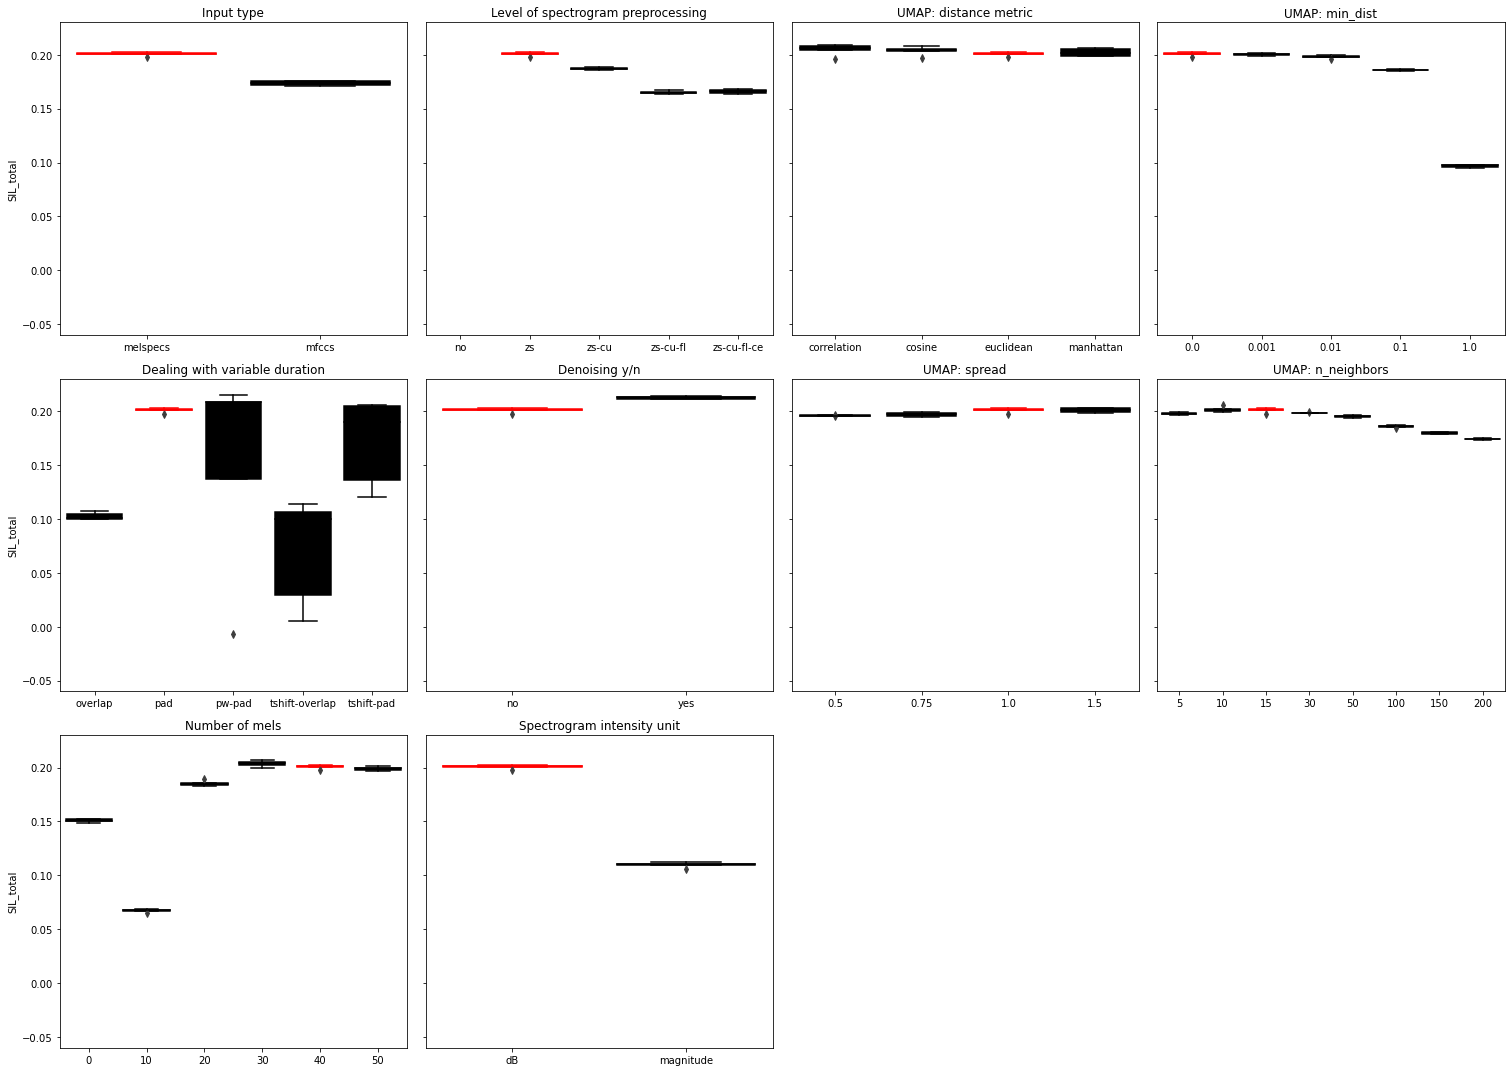

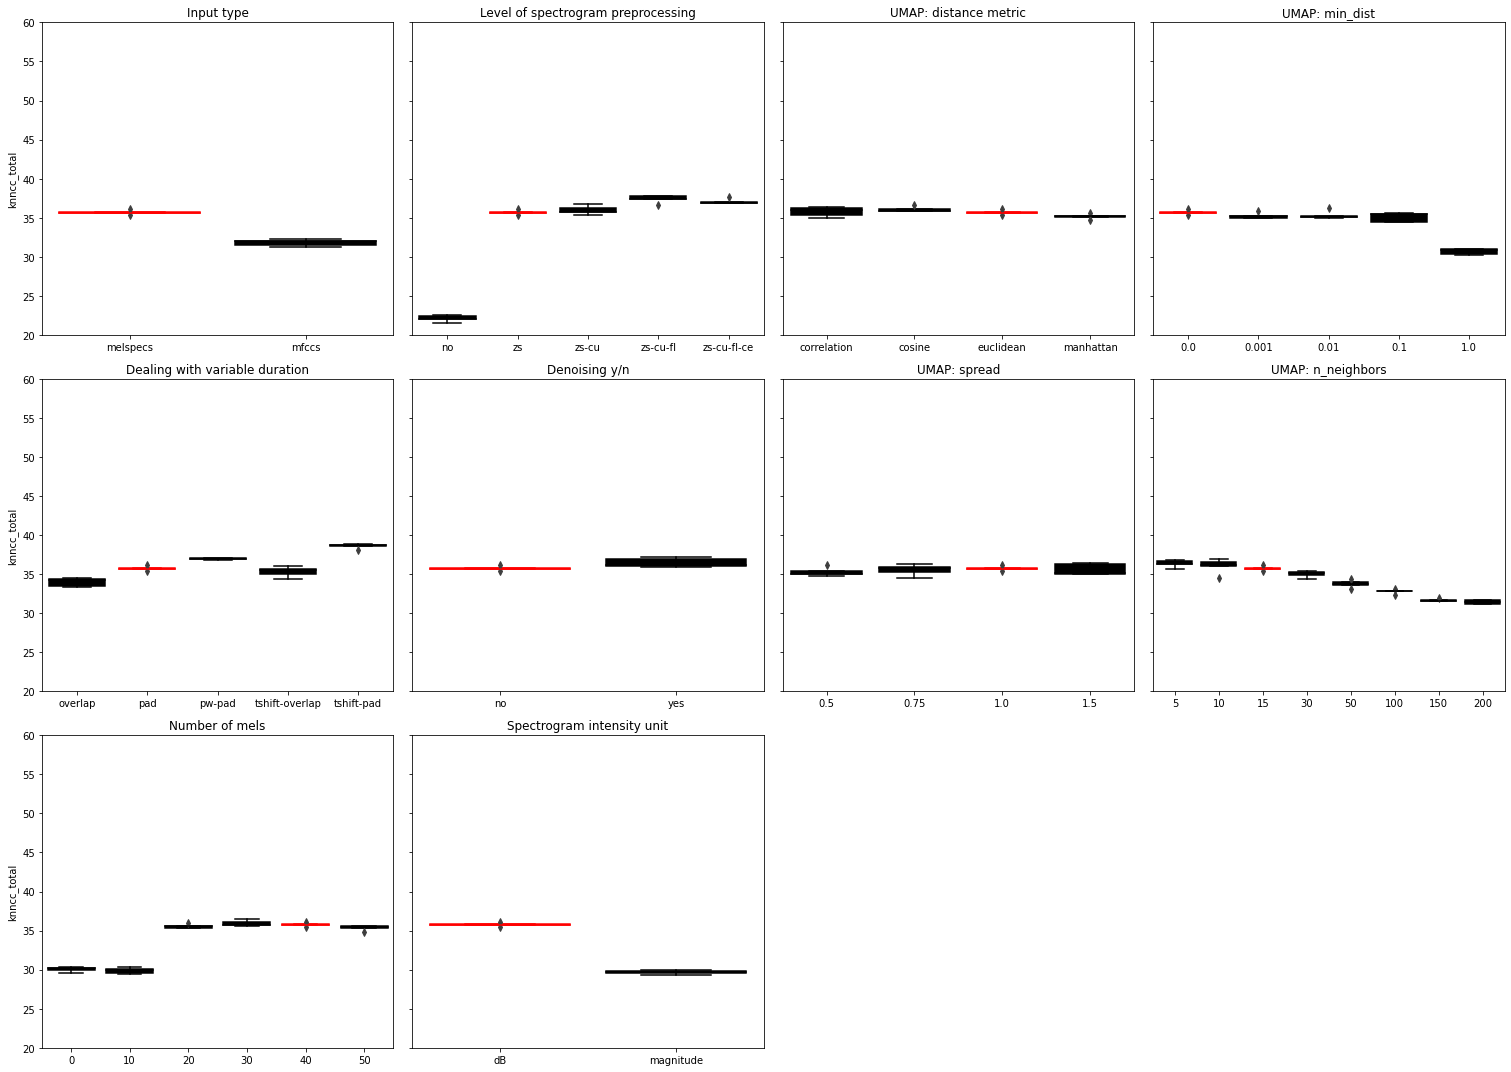

In [138]:
# BOXPLOTS
plot_params = ['input_type',
               'preprocess_type',
               'metric_type',
               'min_dist',                            
               'duration_method',
               'denoised',
               'spread',
               'n_neighbors',               
               'n_mels',
               'f_unit',
               'n_comps']

title_dict = dict(zip(plot_params, ['Input type',
                                    'Level of spectrogram preprocessing', 
                                    'UMAP: distance metric', 
                                    'UMAP: min_dist',                                                                         
                                    'Dealing with variable duration', 
                                    'Denoising y/n',
                                    'UMAP: spread', 
                                    'UMAP: n_neighbors',                                   
                                    'Number of mels', 
                                    'Spectrogram intensity unit',
                                    'Dimensions in latent space'
                                   ]))
n_rows = 3
n_cols = 4

cs = list(range(0,n_cols)) * n_rows
rs_list = [[x]*n_cols for x in list(range(0,n_rows))]
rs = list()
for x in rs_list:
    for y in x:
        rs.append(y)



#fig.suptitle('Effect of different run parameters')
#for outvar in ['S_total']:
for outvar in ['S_total', 'SIL_total', 'knncc_total', 'knn-acc_total']:
#for outvar in ['S_total']:
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(21, 15), sharey=True)
    for i,param in enumerate(plot_params):
        #print(param)
        other_params = set(params).difference([param, 'n_repeat'])
        
        df = eval_table
        for p in other_params:
            df = df.loc[df[p]==p_default[p],:]
        #print(df.shape)
        #print(levels)
        
        levels = sorted(list(set(df[param])))
        #color_dict = {level: "red" if level == p_default[param] else "white" for level in levels}
        
        ax = sns.boxplot(ax=axes[rs[i], cs[i]], data=df, x=param, y=outvar, order=levels)#, palette = color_dict)
        
        for b,box in enumerate(ax.artists):
            if b==levels.index(p_default[param]):
                col = "red"
            else:
                col="black"
            box.set_edgecolor(col)
            box.set_facecolor(col)#

        # iterate over whiskers and median lines
            for j in range(6*b,6*(b+1)):
                ax.lines[j].set_color(col)
            
            
        ax.set_ylim(y_lower_dict[outvar], y_upper_dict[outvar])
        ax.set_title(title_dict[param])
        ax.set_xlabel('')
        ax.set_ylabel('')

    plt.tight_layout()
    plt.setp(axes[:, 0], ylabel=outvar)
    fig.delaxes(ax= axes[2,2]) 
    fig.delaxes(ax= axes[2,3]) 
    plt.savefig(os.path.join(os.path.sep, FIGURES,'box_'+outvar+'_all.jpg'), bbox_inches='tight')
    #plt.close()